In [3]:
import math
import numpy as np
import matplotlib.pyplot as plt 

In [4]:
def cos_decay(step, t_steps, max_lr, min_lr =0):
    lr = min_lr + (max_lr-min_lr)*(1+math.cos(math.pi*step/t_steps))/ 2
    return lr 

In [5]:
def linear_warmup_cos_decay():
    pass

In [7]:
max_lr = 1e-3
min_lr = 0
steps = [50, 100]

solutions = []

for step in steps:
    sol = []
    for i in range(step):
        sol.append(cos_decay(i, step, max_lr, min_lr))
    solutions.append(sol)

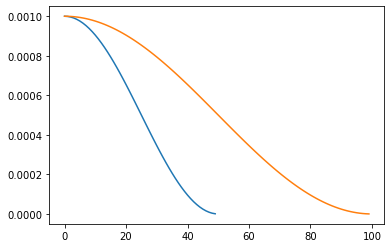

In [8]:
plt.plot(solutions[0],)
plt.plot(solutions[1])

In [9]:
max_lr = 1e-3
min_lr = [0, 1e-4]

solutions = []

for mlr in min_lr:
    sol = []
    for i in range(100):
        sol.append(cos_decay(i, 100, max_lr, mlr))
    solutions.append(sol)

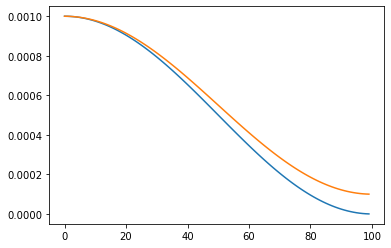

In [10]:
plt.plot(solutions[0],)
plt.plot(solutions[1])

In [60]:
530%100

30

In [90]:
def decayed_cyclical_cos_decay(step, total_steps, max_lr, min_lr, cycles):
    steps_per_cycle = total_steps//cycles
    step_within_cycle = step%steps_per_cycle 
    current_max_lr = cos_decay(step//steps_per_cycle, cycles, max_lr, min_lr)
    lr = min_lr + 0.5*(current_max_lr - min_lr)*(1+math.cos(math.pi*step_within_cycle/steps_per_cycle))
    
    return lr

In [103]:
max_lr = 0.3
min_lr = [1e-6]

solutions = []
total_steps = 200
for mlr in min_lr:
    sol = []
    for i in range(total_steps):
        sol.append(decayed_cyclical_cos_decay(i, total_steps, max_lr, mlr, cycles=3))
    solutions.append(sol)

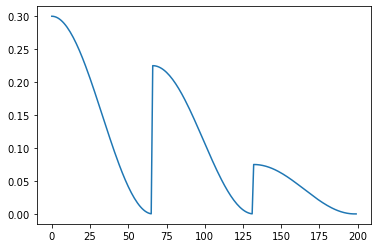

In [104]:
plt.plot(solutions[0],)
#plt.plot(solutions[1])

In [158]:
def double_decayed_cyclical_cos_decay(step, total_steps, max_lr, min_lr, cycles, sharpness=2.5):
    steps_per_cycle = total_steps//cycles
    step_within_cycle = step%steps_per_cycle 
    
    current_max_lr = cos_decay(step//steps_per_cycle, cycles, max_lr, min_lr)
    
    current_min_lr = cos_decay(step//steps_per_cycle, cycles, max_lr/sharpness, min_lr)
    
    lr = current_min_lr + 0.5*(current_max_lr - current_min_lr)*(1+math.cos(math.pi*step_within_cycle/steps_per_cycle))
    
    return lr

In [161]:
max_lr = 0.3
min_lr = [1e-6]

solutions = []
total_steps = 200
for mlr in min_lr:
    sol = []
    for i in range(total_steps):
        sol.append(double_decayed_cyclical_cos_decay(i, total_steps, max_lr, mlr, cycles=5))
    solutions.append(sol)

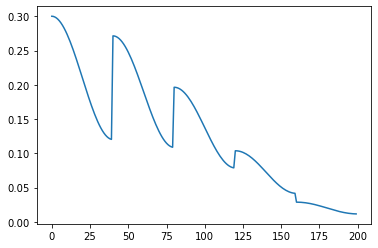

In [162]:
plt.plot(solutions[0],)
#plt.plot(solutions[1])

In [205]:
def warm_up_cos_decay(step, t_steps, max_lr, min_lr =0, warm_up_steps = 5):
    if step <warm_up_steps:
        lr = max_lr + (min_lr - max_lr)*(1- step/warm_up_steps)
    else:
        lr = min_lr + (max_lr-min_lr)*(1+math.cos(math.pi*(step-warm_up_steps)/(t_steps-warm_up_steps)))/ 2
    return lr 

In [206]:
max_lr = 0.3
min_lr = [1e-5]

solutions = []
total_steps = 200
for mlr in min_lr:
    sol = []
    for i in range(total_steps):
        sol.append(warm_up_cos_decay(i, total_steps, max_lr, mlr, warm_up_steps=5))
    solutions.append(sol)

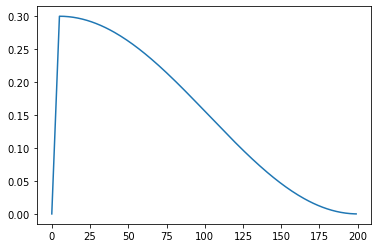

In [207]:
plt.plot(solutions[0],)
#plt.plot(solutions[1])